<a href="https://colab.research.google.com/github/liliya2022/Ames-Housing-Machine-Learning/blob/main/ML_Project_Ames_Housing_Prediction_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Project - Ames Housing Prediction - Part 3**

*By Liliya Lopez*


<img src='https://storage.googleapis.com/kaggle-competitions/kaggle/5407/media/housesbanner.png'/>

## **1.Introduction**

#####**Libraries used**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn import preprocessing
from tensorflow import keras
import sklearn.model_selection as model_selection 
from sklearn.model_selection import train_test_split
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.2


#####**Import dataset**

In [2]:
from google.colab import drive

In [3]:
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
housing = pd.read_csv('drive/MyDrive/Colab Notebooks/Ames_HousePrice.csv', index_col=0)
pd.set_option('display.max_columns', 20)
housing.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [5]:
housing.shape

(2580, 81)

In [6]:
housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

## **2.Prediction**

#####**Correlation**

In [7]:
housing.corr().style.background_gradient()

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
PID,1.000000,-0.102270,-0.226276,-0.005328,-0.095379,0.042049,-0.247168,0.120013,-0.337963,-0.128744,-0.230344,-0.112468,-0.003342,-0.074497,-0.192437,-0.153903,0.012507,0.058171,-0.044292,0.001853,-0.154209,-0.172690,0.001290,0.047760,-0.074269,-0.108646,-0.255861,-0.221074,-0.198988,-0.041876,-0.054843,0.168778,-0.021198,-0.031646,-0.006526,-0.022524,-0.059940,0.002238
GrLivArea,-0.102270,1.000000,0.719981,0.070785,0.345448,0.260322,0.559897,-0.105670,0.228400,0.306035,0.387206,0.164899,-0.021056,0.245545,0.409814,0.539135,0.665001,0.088931,0.044749,-0.053401,0.643937,0.445513,0.538022,0.129797,0.807445,0.457926,0.266934,0.495011,0.477152,0.247716,0.321777,0.000196,0.008714,0.097835,0.057935,-0.003940,0.038389,-0.008260
SalePrice,-0.226276,0.719981,1.000000,-0.084587,0.358577,0.274443,0.790501,-0.101091,0.544370,0.514309,0.500964,0.460792,0.022520,0.167519,0.652222,0.642613,0.263144,-0.030835,0.291080,-0.033802,0.534982,0.285875,0.151806,-0.113977,0.490219,0.488184,0.520763,0.638801,0.634992,0.333232,0.306540,-0.123235,0.031260,0.121463,0.030844,-0.018877,0.012591,-0.001376
MSSubClass,-0.005328,0.070785,-0.084587,1.000000,-0.438724,-0.198040,0.056468,-0.075542,0.053852,0.056756,0.017831,-0.074092,-0.074091,-0.113257,-0.221931,-0.255798,0.306929,0.013473,-0.002150,-0.010580,0.144475,0.181780,-0.023680,0.251357,0.032047,-0.047790,0.111145,-0.031963,-0.091177,-0.017656,-0.007649,-0.028535,-0.041798,-0.055099,-0.013431,-0.027226,0.007252,-0.025351
LotFrontage,-0.095379,0.345448,0.358577,-0.438724,1.000000,0.463720,0.179656,-0.054048,0.099602,0.063548,0.202139,0.177304,0.055247,0.104167,0.307885,0.437324,0.005644,-0.010623,0.106641,-0.028832,0.169696,0.026992,0.247952,0.018644,0.342825,0.249181,0.051578,0.302285,0.337158,0.123743,0.142809,0.003480,0.034406,0.083849,0.086041,0.017859,0.002164,-0.002555
LotArea,0.042049,0.260322,0.274443,-0.198040,0.463720,1.000000,0.080607,-0.032693,0.012397,0.010293,0.103416,0.163468,0.082339,0.019738,0.222042,0.313086,0.022434,-0.000334,0.118788,0.027586,0.124352,0.026727,0.140430,-0.014575,0.204545,0.245148,-0.016526,0.175733,0.199241,0.155687,0.084963,0.017694,0.017721,0.053820,0.052636,0.040220,0.010203,-0.017319
OverallQual,-0.247168,0.559897,0.790501,0.056468,0.179656,0.080607,1.000000,-0.095927,0.574400,0.546297,0.405763,0.273919,-0.030383,0.255698,0.528069,0.454481,0.246885,-0.044359,0.173342,-0.050571,0.508255,0.271455,0.067466,-0.153691,0.360675,0.387777,0.558484,0.581023,0.538183,0.250181,0.286861,-0.134291,0.014226,0.049277,-0.002484,-0.025825,0.016780,0.005668
OverallCond,0.120013,-0.105670,-0.101091,-0.075542,-0.054048,-0.032693,-0.095927,1.000000,-0.397274,0.065100,-0.143986,-0.064347,0.029990,-0.123998,-0.179473,-0.156592,0.015073,0.019018,-0.057921,0.085160,-0.210226,-0.096052,0.004108,-0.075642,-0.072482,-0.046570,-0.335619,-0.195780,-0.168238,0.014161,-0.067437,0.085910,0.041904,0.050417,-0.021193,0.046015,0.012211,0.017632
YearBuilt,-0.337963,0.228400,0.544370,0.053852,0.099602,0.012397,0.574400,-0.397274,1.000000,0.572276,0.307228,0.303616,-0.009807,0.092171,0.400983,0.294691,0.015754,-0.132086,0.229570,-0.028800,0.450065,0.272979,-0.048768,-0.136983,0.095450,0.167188,0.834526,0.519494,0.463175,0.227289,0.179654,-0.360933,0.009513,-0.042655,0.004925,-0.027354,-0.007534,0.015349
YearRemodAdd,-0.128744,0.306035,0.514309,0.056756,0.063548,0.010293,0.546297,0.065100,0.572276,1.000000,0.175371,0.156527,-0.051202,0.130649,0.271944,0.217709,0.166301,-0.063714,0.147388,-0.048623,0.434877,0.209656,-0.016713,-0.145110,0.185204,0.123843,0.625360,0.398114,0.348446,0.218273,0.226677,-0.205

In [8]:
housing.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790501
GrLivArea        0.719981
TotalBsmtSF      0.652222
1stFlrSF         0.642613
GarageCars       0.638801
GarageArea       0.634992
YearBuilt        0.544370
FullBath         0.534982
GarageYrBlt      0.520763
YearRemodAdd     0.514309
MasVnrArea       0.500964
TotRmsAbvGrd     0.490219
Fireplaces       0.488184
BsmtFinSF1       0.460792
LotFrontage      0.358577
WoodDeckSF       0.333232
OpenPorchSF      0.306540
BsmtFullBath     0.291080
HalfBath         0.285875
LotArea          0.274443
2ndFlrSF         0.263144
BsmtUnfSF        0.167519
BedroomAbvGr     0.151806
ScreenPorch      0.121463
3SsnPorch        0.031260
PoolArea         0.030844
BsmtFinSF2       0.022520
MoSold           0.012591
YrSold          -0.001376
MiscVal         -0.018877
LowQualFinSF    -0.030835
BsmtHalfBath    -0.033802
MSSubClass      -0.084587
OverallCond     -0.101091
KitchenAbvGr    -0.113977
EnclosedPorch   -0.123235
PID             -0.226276
Name: SalePr

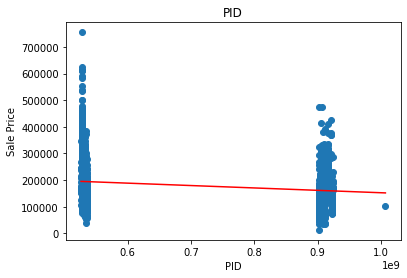

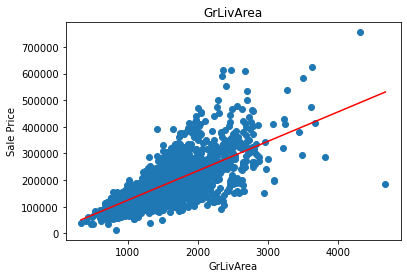

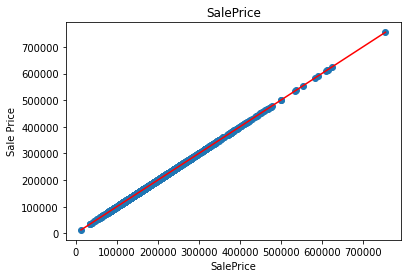

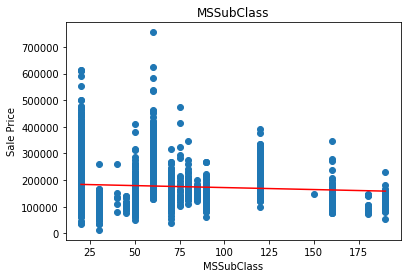

LotFrontage


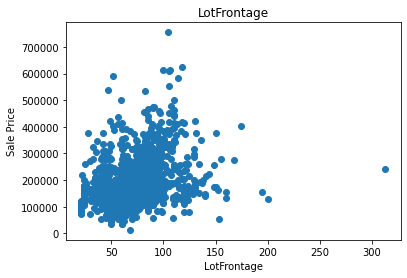

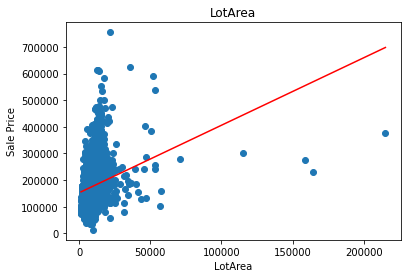

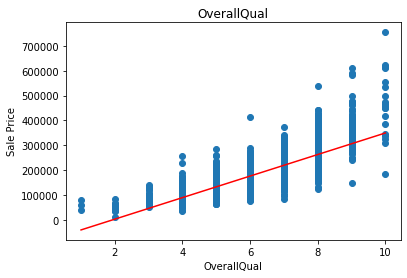

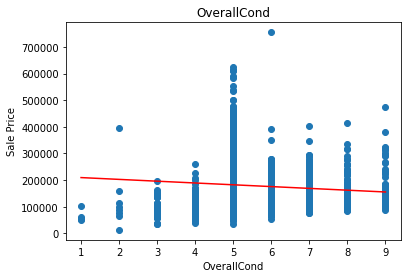

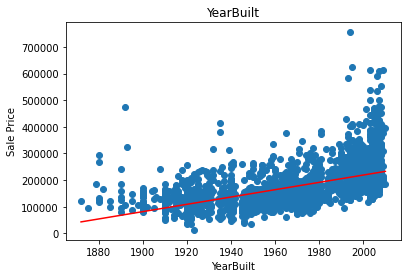

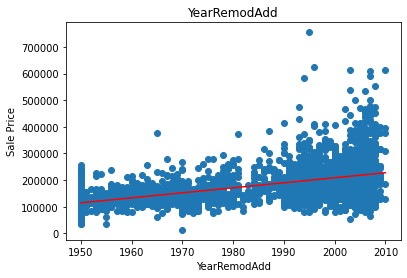

MasVnrArea


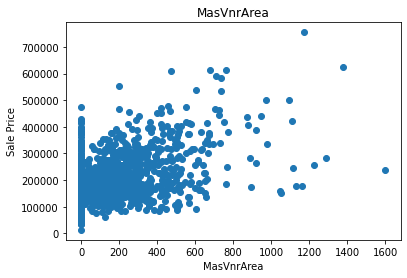

BsmtFinSF1


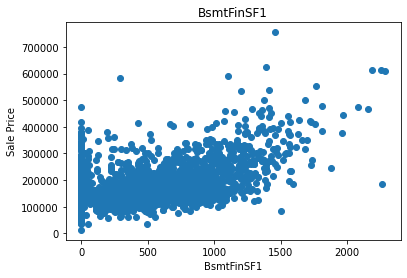

BsmtFinSF2


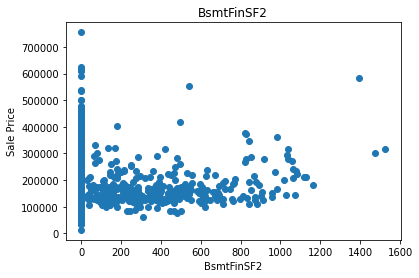

BsmtUnfSF


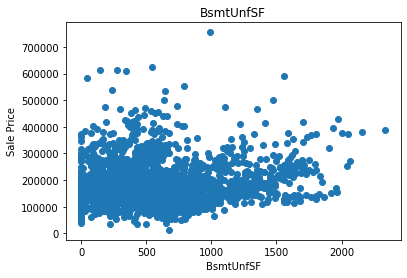

TotalBsmtSF


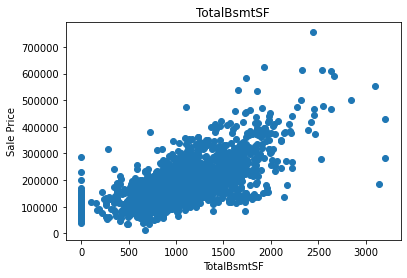

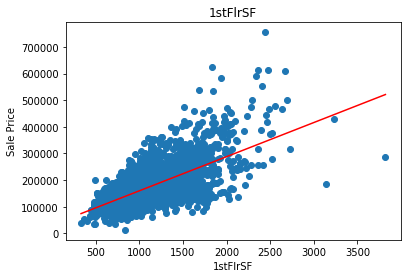

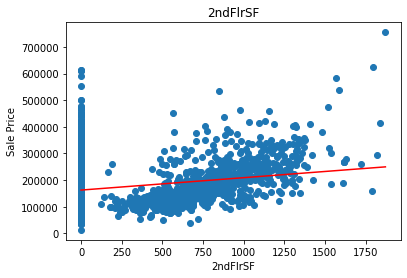

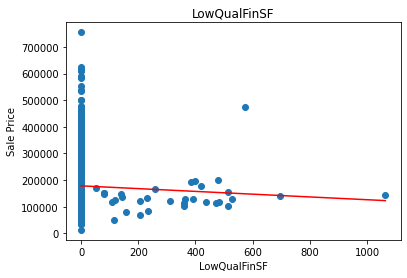

BsmtFullBath


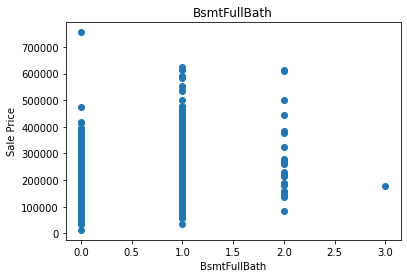

BsmtHalfBath


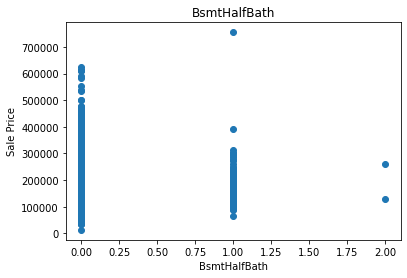

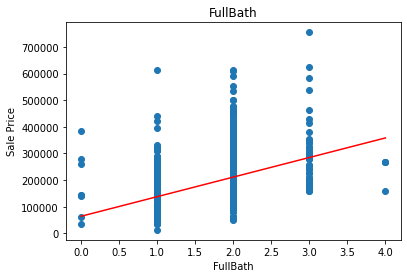

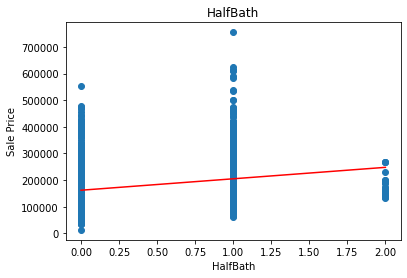

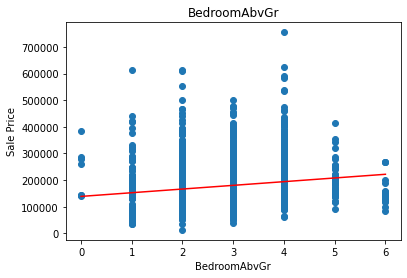

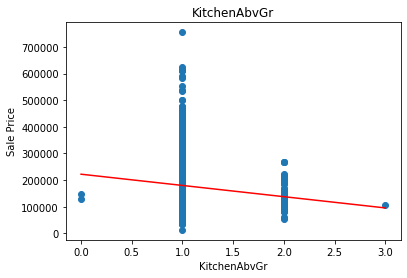

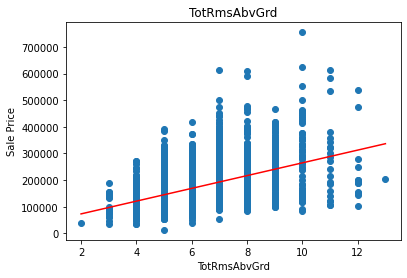

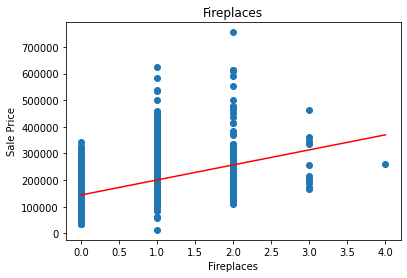

GarageYrBlt


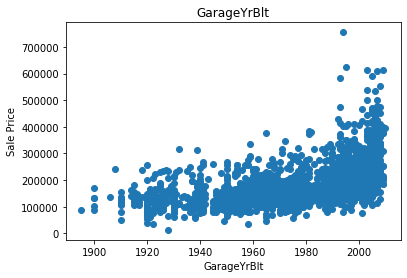

GarageCars


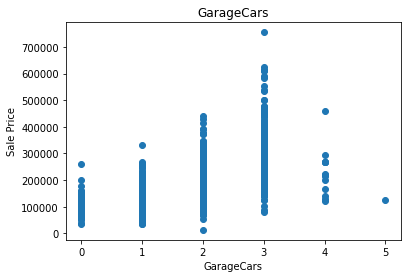

GarageArea


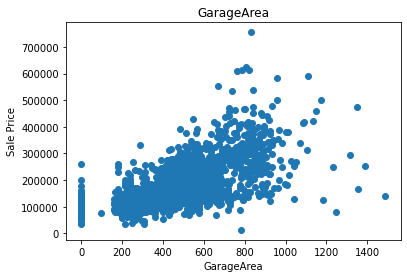

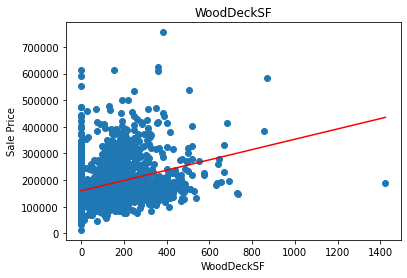

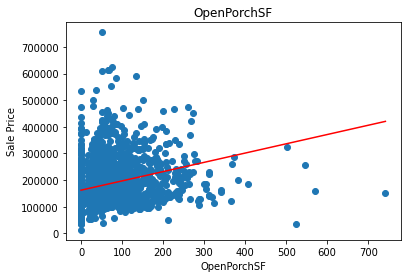

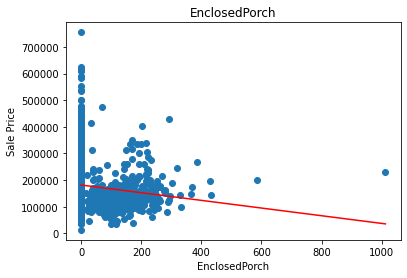

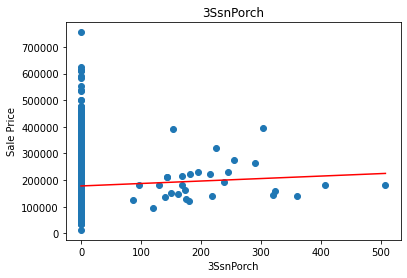

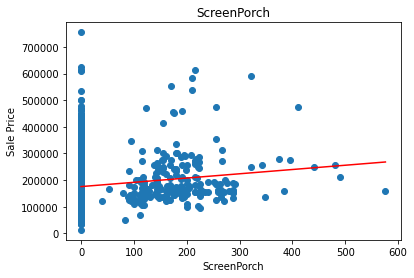

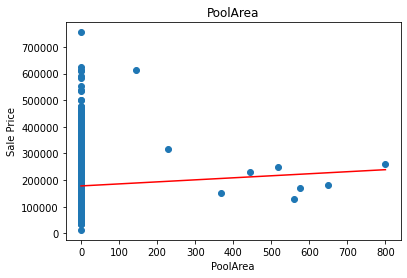

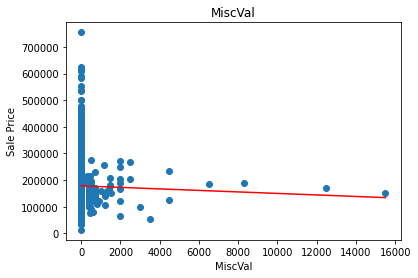

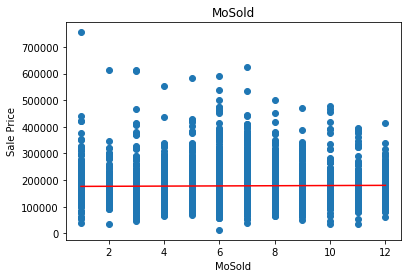

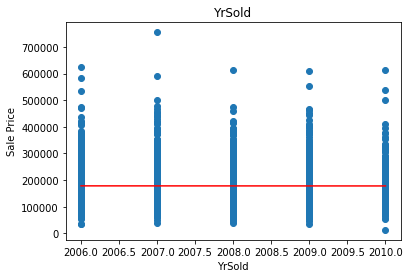

In [9]:
col_names_housing = housing.columns
for v in col_names_housing:
  if housing[v].dtypes in ("int64", "float64"):
    price = housing["SalePrice"]
    other = housing[v]
    plt.xlabel(v)
    plt.ylabel('Sale Price')
    plt.title(v)
    plt.scatter(other, price)
    try:
      plt.plot(np.unique(other), np.poly1d(np.polyfit(other, price, 1))(np.unique(other)), color="r")
    except:
      print(v)
    plt.show()

#####**Building a model**

In [10]:
features = housing[['GrLivArea', 'OverallQual', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea']]
target = housing['SalePrice']

In [11]:
features = features.fillna(0.0)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features, target)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1935, 13)
(1935,)
(645, 13)
(645,)


In [14]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

In [15]:
model = Sequential()
model.add(Dense(128, input_shape=X_train[0].shape, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="relu"))
model.compile(optimizer="adam", metrics=["mae"], loss="mse")

In [16]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_loss"]
        if val_acc <= self.threshold:
            self.model.stop_training = True
            
my_callback = MyThresholdCallback(threshold=26)

In [17]:
history = model.fit(
    x=X_train,
    y=y_train,
    verbose=1,
    batch_size=1,
    epochs=100,
    validation_data=(X_test, y_test),
    callbacks=[my_callback]
)

Epoch 1/100
1935/1935 [==============================] - 7s 3ms/step - loss: 7152908800.0000 - mae: 60226.4258 - val_loss: 4413151744.0000 - val_mae: 45782.7969
Epoch 2/100
1935/1935 [==============================] - 6s 3ms/step - loss: 3022626560.0000 - mae: 39483.1719 - val_loss: 2614328576.0000 - val_mae: 32712.6211
Epoch 3/100
1935/1935 [==============================] - 5s 3ms/step - loss: 1974141952.0000 - mae: 31165.9121 - val_loss: 2046205696.0000 - val_mae: 31290.6797
Epoch 4/100
1935/1935 [==============================] - 6s 3ms/step - loss: 1849087616.0000 - mae: 30566.8516 - val_loss: 1966966016.0000 - val_mae: 31295.1934
Epoch 5/100
1935/1935 [==============================] - 6s 3ms/step - loss: 1768218496.0000 - mae: 29910.7012 - val_loss: 2027089664.0000 - val_mae: 31565.4766
Epoch 6/100
1935/1935 [==============================] - 5s 3ms/step - loss: 1739056640.0000 - mae: 29551.4336 - val_loss: 1869429120.0000 - val_mae: 30074.1094
Epoch 7/100
1935/1935 [===========

In [18]:
model.save('drive/MyDrive/Colab Notebooks/ames_housing_model')

In [19]:
model_loaded = keras.models.load_model('drive/MyDrive/Colab Notebooks/ames_housing_model')

In [20]:
predictions = model_loaded.predict(X_test)

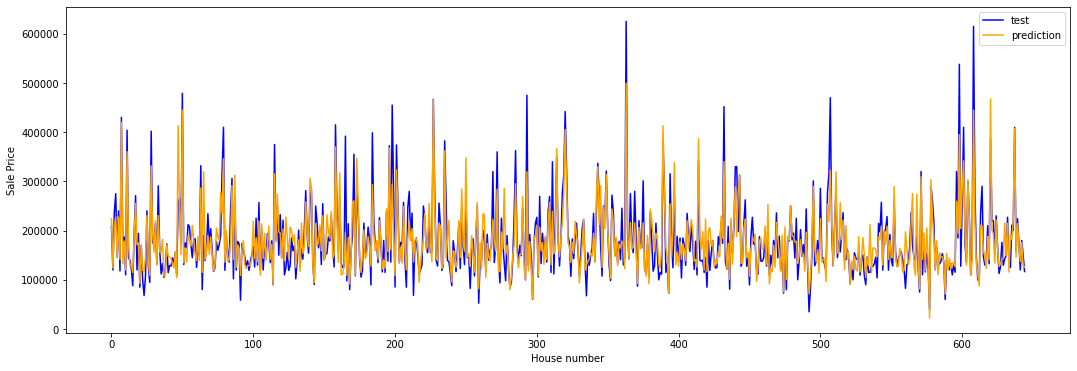

In [21]:
plt.figure(figsize=(18, 6))
x = np.arange(0, predictions.size)
plt.plot(x, y_test, color = 'blue', label = 'test') 
plt.plot(x, predictions, color = 'orange', label = 'prediction') 
plt.xlabel("House number")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

In [22]:
#pip install --use-deprecated=legacy-resolver pycaret[full]